In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

from PIL import Image

import os
import csv

In [2]:
dataset = load_dataset("e1010101/tongue-images-384-no-augmentation")

In [3]:
def crop_center_10_percent(image):
    # Convert PIL Image to numpy array
    image_array = np.array(image)
    height, width = image_array.shape[:2]
    
    # Calculate the dimensions of the 40% crop
    crop_height = int(height * 0.1)
    crop_width = int(width * 0.1)
    
    # Calculate the starting points for cropping
    start_y = (height - crop_height) // 2
    start_x = (width - crop_width) // 2
    
    # Crop the image
    cropped_image_array = image_array[start_y:start_y+crop_height, start_x:start_x+crop_width]
    
    # Convert back to PIL Image
    cropped_image = Image.fromarray(cropped_image_array)
    
    return cropped_image

In [4]:
def crop_dataset(dataset):
    cropped_dataset = dataset.map(lambda example: {'image': crop_center_10_percent(example['image'])})
    return cropped_dataset

In [5]:
cropped_train = crop_dataset(dataset['train'])
cropped_valid = crop_dataset(dataset['validation'])
cropped_test = crop_dataset(dataset['test'])

Map:   0%|          | 0/746 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

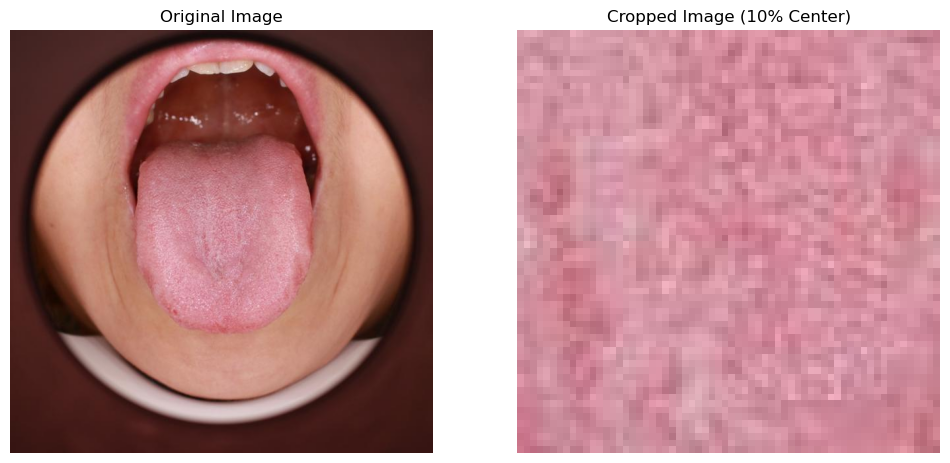

In [6]:
sample_index = 0
original_image = dataset['train'][sample_index]['image']
cropped_image = cropped_train[sample_index]['image']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(original_image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(cropped_image)
ax2.set_title('Cropped Image (10% Center)')
ax2.axis('off')
plt.show()

In [ ]:
def save_dataset(dataset, split_name, output_dir):
    split_dir = os.path.join(output_dir, split_name)
    os.makedirs(split_dir, exist_ok=True)
    
    for idx, example in enumerate(dataset):
        image = example['image']
        image_path = os.path.join(split_dir, f"{split_name}_{idx:05d}.png")
        image.save(image_path)

output_dir = "dataset_cropped"
save_dataset(cropped_train, "train", output_dir)
save_dataset(cropped_valid, "valid", output_dir)
save_dataset(cropped_test, "test", output_dir)